In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
load = np.loadtxt('../../data/pkd_out/pkdgrav3_test.00100.pk')
k = load[:, 0]
pk = load[:, 1]
nk = load[:, 2]

## Quijote reference

In [4]:
data = np.loadtxt('../../data/quijote/Pk/matter/fiducial/0/Pk_m_z=0.txt')
k_ref = data[:, 0]
pk_ref = data[:, 1]

## Plot

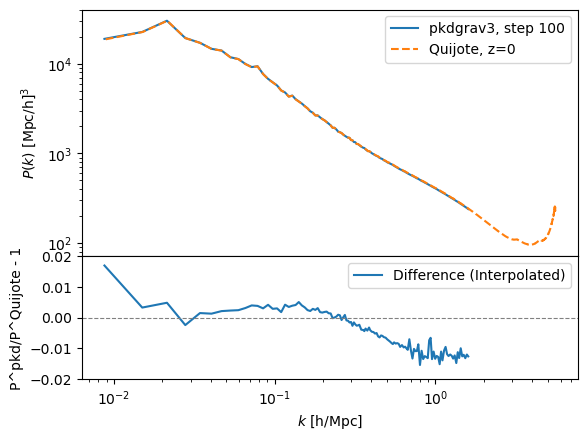

In [16]:
from scipy.interpolate import interp1d

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0, 'height_ratios': [2, 1]})

# 上图
ax1.plot(k, pk, label='pkdgrav3, step 100')
ax1.plot(k_ref, pk_ref, '--', label='Quijote, z=0')
ax1.set_ylabel(r'$P(k)$ [Mpc/h]$^3$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()

# 下图
# Interpolate pk_ref to match k
interp_func = interp1d(k_ref, pk_ref, kind='linear', bounds_error=False, fill_value="extrapolate")
pk_ref_interp = interp_func(k)

# Plot the interpolated percent difference
percent_diff = pk  / pk_ref_interp - 1
ax2.plot(k, percent_diff, label='Difference (Interpolated)')
ax2.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.set_ylim(-0.02, 0.02)
ax2.set_xlabel(r'$k$ [h/Mpc]')
ax2.set_ylabel('P^pkd/P^Quijote - 1')
ax2.set_xscale('log')
ax2.legend()
